In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold6_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.020911,-0.127477,0.277960,0.146355,-0.220386,-0.099827,0.122825,-0.147898,-0.149589,-0.062718,...,-0.159865,0.016757,-0.139785,-0.100571,0.022004,-0.123881,Abnormal,P31,FP-B,AB01
1,-0.033280,-0.133674,0.447235,0.390055,-0.222400,0.025273,0.417477,-0.178778,-0.129692,0.094286,...,-0.191599,0.002256,-0.073620,0.003944,0.043616,-0.146057,Abnormal,P1,FP-A,AB01
2,-0.106651,-0.149321,0.311381,0.459218,-0.181474,-0.051652,0.470434,-0.218718,-0.187560,0.077261,...,-0.201513,-0.088357,-0.144163,-0.114049,-0.067244,-0.104906,Abnormal,P2,FP-A,AB01
3,0.013116,-0.152317,0.305052,0.006041,-0.211008,-0.078408,0.189831,-0.129215,-0.216127,-0.122712,...,-0.209013,0.004920,-0.144176,-0.139873,-0.059496,-0.154004,Abnormal,P42,FP-B,AB01
4,-0.026548,-0.128707,0.330541,0.080943,-0.185411,-0.033375,0.354434,-0.188885,0.022435,-0.011860,...,-0.127794,-0.010310,-0.114272,-0.102033,-0.089128,-0.151950,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0.204296,0.958711,-0.117341,-0.112182,0.623579,-0.174810,-0.110222,0.318399,1.090425,-0.206335,...,0.946325,-0.149615,-0.170929,0.746567,-0.161698,0.866636,Normal,P32,FP-B,Normal
4595,-0.150302,0.148631,-0.176417,-0.148006,0.265298,-0.211419,-0.166857,0.422825,0.140147,-0.188787,...,0.687210,-0.156001,-0.132510,0.249815,-0.030520,0.307934,Normal,P42,FP-B,Normal
4596,-0.048337,0.736193,-0.176698,0.177423,0.577539,0.019362,-0.104220,0.235313,0.354409,-0.193638,...,0.417506,-0.161641,-0.119103,0.803968,0.112037,1.079000,Normal,P52,FP-C,Normal
4597,-0.164594,0.545354,-0.181926,-0.178953,1.018164,-0.201767,-0.167837,0.797889,0.669921,-0.219670,...,0.594888,-0.116386,-0.175283,0.864615,-0.212088,1.468545,Normal,P61,FP-C,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4599, 2048)
(4599,)


In [20]:
y[0]

'FP-B'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.572079,0.047202,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.572732,0.046710,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.575561,0.046033,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.573168,0.045563,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.562730,0.042142,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.663829,0.049890,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.663175,0.053620,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.661872,0.048712,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.661217,0.052622,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.626212,0.038631,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5720791891635881

 **print the array of mean scores only 

[0.57207919 0.57273184 0.57556077 0.57316757 0.56273042 0.66382874
 0.66317514 0.66187174 0.66121673 0.62621247 0.69752676 0.70317988
 0.70144028 0.69578952 0.6468689  0.70448518 0.70622431 0.70535521
 0.69991664 0.64491238 0.70383442 0.70600786 0.70426731 0.70057071
 0.64447807]

 **examine the best model 

0.7062243061475798
{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 400}
RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=400,
                       random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 400}
Best score is 0.7062243061475798


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 25, n_estimators = 400, min_samples_split = 5) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold6_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.030033,-0.168047,0.190528,0.228052,-0.133099,-0.073283,0.147607,-0.080972,-0.119341,...,-0.170909,-0.152570,-0.167494,-0.133137,-0.155304,-0.128978,Abnormal,P42,FP-B,AB01
1,1,-0.072033,0.059004,0.264769,0.037914,-0.195818,-0.077529,0.233249,-0.063936,-0.203762,...,-0.126178,-0.110011,-0.137647,-0.091916,-0.024763,-0.119757,Abnormal,P2,FP-A,AB01
2,2,-0.066855,-0.098778,-0.174455,-0.097675,-0.172910,-0.119162,-0.183226,-0.079950,-0.119603,...,-0.155933,-0.118044,-0.116492,0.014855,-0.200639,-0.115070,Abnormal,P51,FP-C,AB01
3,3,-0.164899,-0.137043,0.030739,0.282006,-0.110273,-0.154812,0.096774,-0.149772,-0.065819,...,-0.107320,-0.144773,-0.165934,0.055076,-0.071099,-0.100872,Abnormal,P1,FP-A,AB01
4,4,-0.168137,-0.054375,-0.102106,0.019492,-0.163883,-0.227633,-0.084770,-0.097355,-0.082006,...,-0.196706,-0.237798,-0.075828,0.223701,-0.144849,-0.078928,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,-0.089932,0.966502,-0.061667,-0.077552,0.749401,-0.156538,-0.115387,0.022432,0.792956,...,-0.027156,-0.183324,-0.014921,0.625583,-0.066625,0.457226,Normal,P32,FP-B,Normal
654,654,0.041996,-0.166815,0.024205,-0.179397,-0.155007,-0.190471,-0.091025,0.342036,0.167473,...,0.043427,-0.186619,-0.126861,0.025019,-0.139925,-0.125518,Normal,P42,FP-B,Normal
655,655,-0.073415,0.694064,-0.195658,-0.050105,0.957885,-0.167023,-0.168058,0.331353,0.739299,...,0.737058,-0.204399,-0.100990,0.721133,-0.035987,0.720174,Normal,P52,FP-C,Normal
656,656,-0.111359,0.792717,-0.042777,-0.200866,0.177290,-0.197256,-0.157094,0.618329,0.345660,...,0.609835,-0.155365,-0.202416,0.715337,-0.192799,0.378262,Normal,P61,FP-C,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(658, 2048)
(658,)


In [30]:
y_test

0      FP-B
1      FP-A
2      FP-C
3      FP-A
4      FP-B
       ... 
653    FP-B
654    FP-B
655    FP-C
656    FP-C
657    FP-E
Name: Views, Length: 658, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 62  49  22   1   1]
 [  9 167  16   2   7]
 [  2  46 135   5   0]
 [  0   7  25  66   1]
 [  2   8   0   1  24]]
              precision    recall  f1-score   support

        FP-A       0.83      0.46      0.59       135
        FP-B       0.60      0.83      0.70       201
        FP-C       0.68      0.72      0.70       188
        FP-D       0.88      0.67      0.76        99
        FP-E       0.73      0.69      0.71        35

    accuracy                           0.69       658
   macro avg       0.74      0.67      0.69       658
weighted avg       0.72      0.69      0.69       658



Text(0.5, 21.5, 'Predicted label')

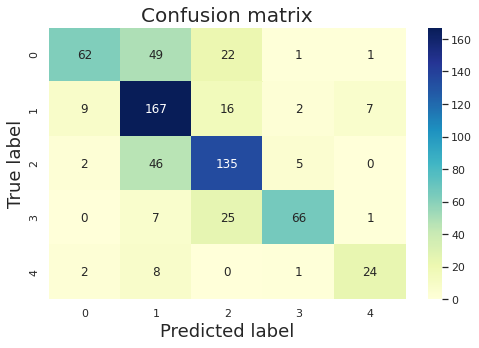

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_6/models/')
filename = "modelrf_AN_5FP_fold6_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)